In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Convolutional Neural Networks expect input data to be in the form of 4D tensors:
(num_samples, height, width, channels)

In MNIST, each image is a 28 X 28 grayscale image

In grayscale images, number of channels is 1

We are also one-hot encoding each pixel of the data, which is done by the to_categorical function

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

2023-04-20 09:21:36.489769: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 09:21:36.491917: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 124s 2ms/sample - loss: 0.2211 - accuracy: 0.9343 - val_loss: 0.0555 - val_accuracy: 0.9825
Epoch 2/10
60000/60000 [==============================] - 126s 2ms/sample - loss: 0.1019 - accuracy: 0.9715 - val_loss: 0.0363 - val_accuracy: 0.9880
Epoch 3/10
60000/60000 [==============================] - 128s 2ms/sample - loss: 0.0720 - accuracy: 0.9798 - val_loss: 0.0340 - val_accuracy: 0.9889
Epoch 4/10
60000/60000 [==============================] - 130s 2ms/sample - loss: 0.0602 - accuracy: 0.9831 - val_loss: 0.0325 - val_accuracy: 0.9896
Epoch 5/10
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.0488 - accuracy: 0.9863 - val_loss: 0.0316 - val_accuracy: 0.9900
Epoch 6/10
60000/60000 [==============================] - 146s 2ms/sample - loss: 0.0403 - accuracy: 0.9889 - val_loss: 0.0319 - val_accuracy: 0.9915
Epoch 7/10
60000/60000 [==========================

In [8]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy*100:.2f}%')

Test accuracy: 99.20%


In [9]:
predictions = model.predict(X_test)
predictions

array([[1.01168345e-16, 3.08238469e-11, 8.97687924e-10, ...,
        1.00000000e+00, 1.11817904e-14, 9.39510869e-09],
       [9.45084150e-11, 7.99263000e-12, 1.00000000e+00, ...,
        5.58756925e-13, 1.56070556e-12, 1.09154076e-15],
       [2.13239182e-09, 9.99998569e-01, 5.13260154e-08, ...,
        4.02404396e-07, 6.91933533e-09, 1.12060423e-08],
       ...,
       [5.23914753e-21, 8.20115249e-19, 6.99286248e-18, ...,
        5.80013807e-14, 7.51075549e-15, 4.55887417e-09],
       [7.41150603e-18, 6.75751967e-19, 7.13454200e-20, ...,
        3.69379467e-19, 3.29681703e-12, 3.39390788e-14],
       [4.06835191e-11, 5.02798038e-15, 1.96137572e-12, ...,
        6.27297466e-21, 5.81253413e-11, 7.03882195e-17]], dtype=float32)

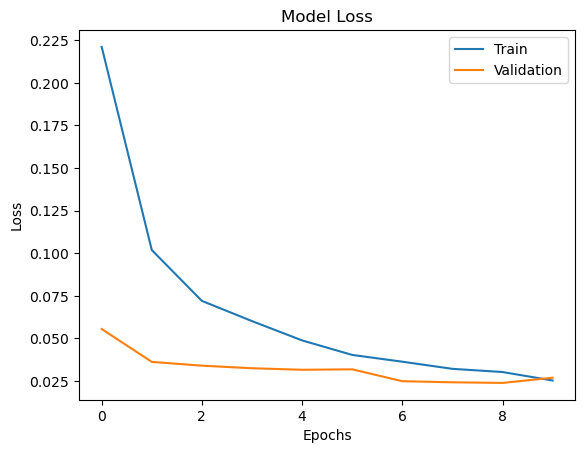

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()